# Scraping

Top words: [('地球環境の保全', 2), ('生物多様性の保全及び持続可能な利用に関する取組', 2), ('循環型社会の形成', 2), ('水環境', 2), ('土壌環境', 2), ('海洋環境', 2), ('大気環境の保全', 2), ('再生に関', 2), ('する取組', 2), ('包括的な化学物質対策に関する取組', 2)]


/var/folders/g9/jqt9rdw11_3dp7gkn_dfw_9m0000gn/T/ipykernel_60835/2129051773.py:41: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/g9/jqt9rdw11_3dp7gkn_dfw_9m0000gn/T/ipykernel_60835/2129051773.py:41: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/g9/jqt9rdw11_3dp7gkn_dfw_9m0000gn/T/ipykernel_60835/2129051773.py:41: UserWarning: Glyph 29872 (\N{CJK UNIFIED IDEOGRAPH-74B0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/g9/jqt9rdw11_3dp7gkn_dfw_9m0000gn/T/ipykernel_60835/2129051773.py:41: UserWarning: Glyph 22659 (\N{CJK UNIFIED IDEOGRAPH-5883}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/g9/jqt9rdw11_3dp7gkn_dfw_9m0000gn/T/ipykernel_60835/2129051773.py:41: UserWarning: Glyph 30333 (\N{CJK UNIFIED IDEOGRAPH-767D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/g9/jqt9

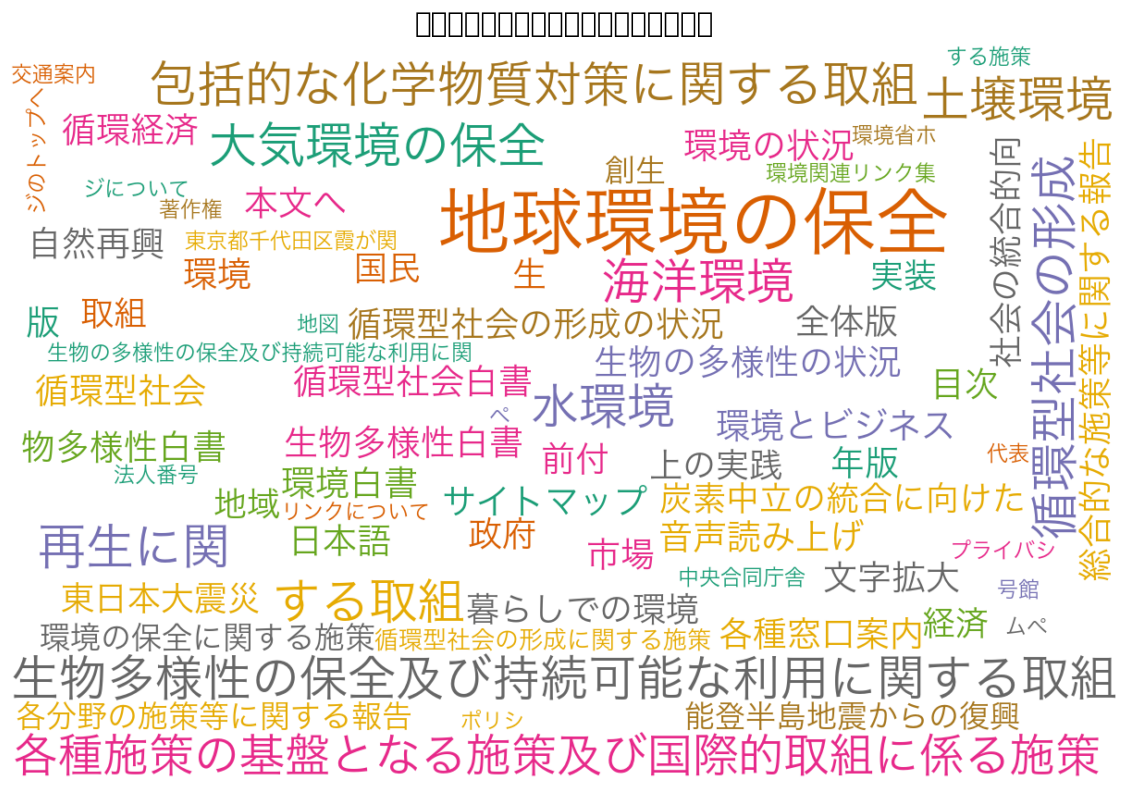

In [49]:
import fitz
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

pdf_path = "report.pdf"
doc = fitz.open(pdf_path)

all_text = ""
for page in doc:
    all_text += page.get_text()

pattern = re.compile(r"[ぁ-んァ-ン一-龥]+")
words = pattern.findall(all_text)

manual_exclude = {
    "令和", "第", "年度", "章", "環境省", "省", "部", "分割版"
}

filtered_words = [word for word in words if word not in manual_exclude]
counter = Counter(filtered_words)


print("Top words:", counter.most_common(10))

font_path = "/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc"

wordcloud = WordCloud(
    font_path=font_path,
    width=1200,
    height=800,
    background_color="white",
    colormap="Dark2"
).generate_from_frequencies(counter)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("日本環境白書：気候関連ワードクラウド", fontsize=20)
plt.tight_layout()
plt.show()